# Homework 1 Ahmet Akman
This notebook will consist the efforts led by homework 1 and done by Ahmet Akman in the scope of EE449 Course

## Imports

In [4]:
import numpy as np
# import torch
import matplotlib.pyplot as plt
# import sklearn

## Basic Neural Network Construction and Training


### 1.1




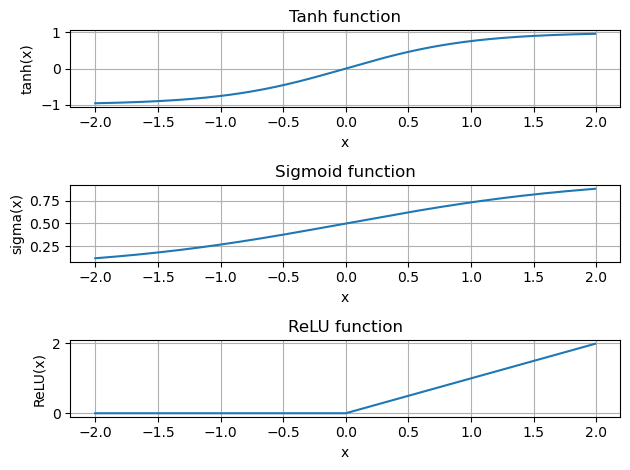

In [5]:
x = np.arange(-2, 2, 0.01, dtype = float)
tanh_result = (np.exp(2*x)-1) / (np.exp(2*x)+1)
sigmoid_result =  1 / (np.exp(-x)+1)
ReLU_result = np.maximum(0,x)


fig, ax = plt.subplots(3)
ax[0].plot(x,tanh_result)
ax[0].set_title("Tanh function")
ax[0].set_xlabel("x")
ax[0].set_ylabel("tanh(x)")
ax[0].grid()

ax[1].plot(x,sigmoid_result)
ax[1].set_title("Sigmoid function")
ax[1].set_xlabel("x")
ax[1].set_ylabel("sigma(x)")
ax[1].grid()

ax[2].plot(x,ReLU_result)
ax[2].set_title("ReLU function")
ax[2].set_xlabel("x")
ax[2].set_ylabel("ReLU(x)")
ax[2].grid()
fig.tight_layout()


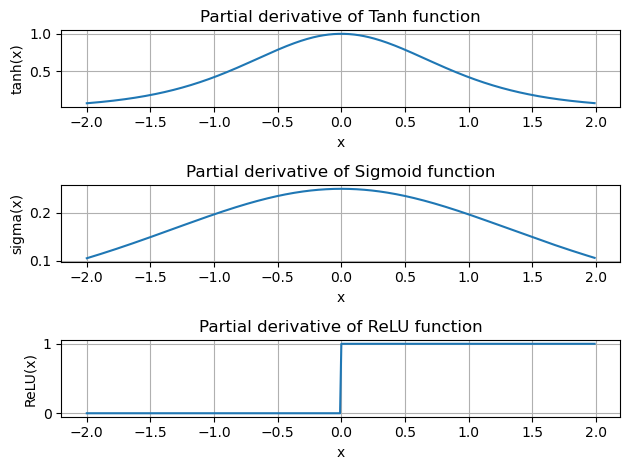

In [6]:
p_tanh_result = 1- (np.exp(x)-np.exp(-x))**2 / (np.exp(x) + np.exp(-x))**2
p_sigmoid_result =  np.exp(-x) / (np.exp(-x)+1)**2
p_ReLU_result = x >= 0 


fig, ax = plt.subplots(3)
ax[0].plot(x, p_tanh_result)
ax[0].set_title("Partial derivative of Tanh function")
ax[0].set_xlabel("x")
ax[0].set_ylabel("tanh(x)")
ax[0].grid()

ax[1].plot(x, p_sigmoid_result)
ax[1].set_title("Partial derivative of Sigmoid function")
ax[1].set_xlabel("x")
ax[1].set_ylabel("sigma(x)")
ax[1].grid()

ax[2].plot(x, p_ReLU_result)
ax[2].set_title("Partial derivative of ReLU function")
ax[2].set_xlabel("x")
ax[2].set_ylabel("ReLU(x)")
ax[2].grid()
fig.tight_layout()

### 1.2
- Sigmoid activated MLP.


Epoch 0: Loss = 1.553
Epoch 1000: Loss = 0.501
Epoch 2000: Loss = 0.429
Epoch 3000: Loss = 0.407
Epoch 4000: Loss = 0.414
Epoch 5000: Loss = 0.445
Epoch 6000: Loss = 0.597
Epoch 7000: Loss = 0.639
Epoch 8000: Loss = 0.633
Epoch 9000: Loss = 0.625
35.0 % of test examples classified correctly.


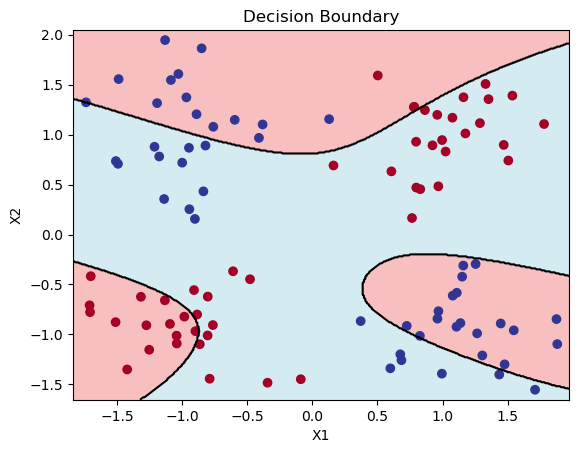

In [17]:
np.random.seed(1234)
learning__rate_for_all_activation_functions = 0.00001

class MLP_sigmoid:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return np.exp(x) / (np.exp(x)+1)
    def sigmoid_derivative(self, x):
        return np.exp(-x) / (np.exp(-x)+1)**2

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_output =  self.sigmoid(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output =  np.round(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        output_error = targets - self.output
        hidden_error = output_error * self.sigmoid_derivative(self.hidden_output)
        # Compute gradients
        output_delta = output_error * self.sigmoid_derivative(self.output)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output = self.bias_output + learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

from utils import part1CreateDataset, part1PlotBoundary
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = learning__rate_for_all_activation_functions
# Create neural network
nn = MLP_sigmoid(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train, y_train, learning_rate)

    # Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((y_train - output)**2)
        print(f'Epoch {epoch}: Loss = {loss}')

        
# Test the trained neural network
y_predict = nn.forward(x_val)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')


part1PlotBoundary(x_val, y_val, nn)

- Tanh activated MLP. 

Epoch 0: Loss = 2.148


Epoch 1000: Loss = 0.747
Epoch 2000: Loss = 0.132
Epoch 3000: Loss = 0.06
Epoch 4000: Loss = 0.062
Epoch 5000: Loss = 0.067
Epoch 6000: Loss = 0.06
Epoch 7000: Loss = 0.06
Epoch 8000: Loss = 0.07
Epoch 9000: Loss = 0.063
95.0 % of test examples classified correctly.


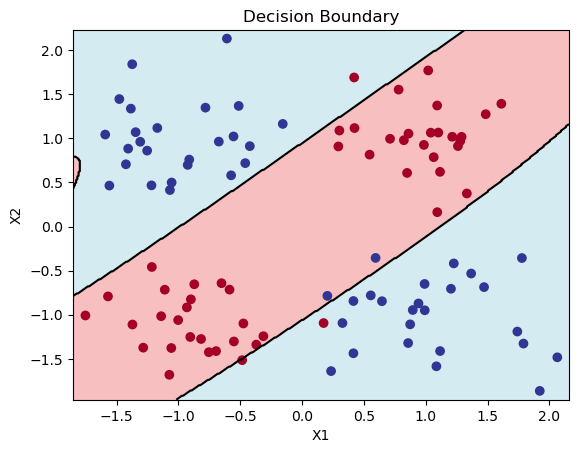

In [18]:
class MLP_tanh:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def tanh(self, x):
        return (np.exp(2*x)-1) / (np.exp(2*x)+1)
    def tanh_derivative(self, x):
        return 1- (np.exp(x)-np.exp(-x))**2 / (np.exp(x) + np.exp(-x))**2

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_output =  self.tanh(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output =  np.round(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        output_error = targets - self.output
        hidden_error = output_error * self.tanh_derivative(self.hidden_output)
        # Compute gradients
        output_delta = output_error * self.tanh_derivative(self.output)
        hidden_delta = hidden_error * self.tanh_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output = self.bias_output + learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

from utils import part1CreateDataset, part1PlotBoundary
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = learning__rate_for_all_activation_functions
# Create neural network
nn = MLP_tanh(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train, y_train, learning_rate)

    # Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((y_train - output)**2)
        print(f'Epoch {epoch}: Loss = {loss}')

        
# Test the trained neural network
y_predict = nn.forward(x_val)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')


part1PlotBoundary(x_val, y_val, nn)

- ReLU Activated MLP


Epoch 0: Loss = 1.685
Epoch 1000: Loss = 0.075
Epoch 2000: Loss = 0.03
Epoch 3000: Loss = 0.023
Epoch 4000: Loss = 0.018
Epoch 5000: Loss = 0.017
Epoch 6000: Loss = 0.017
Epoch 7000: Loss = 0.016
Epoch 8000: Loss = 0.017
Epoch 9000: Loss = 0.015
99.0 % of test examples classified correctly.


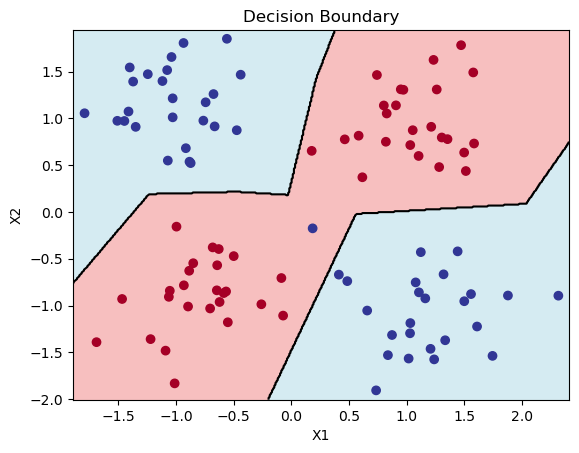

In [19]:
class MLP_ReLU:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def ReLU(self, x):
        return np.maximum(0,x)
    def ReLU_derivative(self, x):
        return x >= 0

    def forward(self, inputs):
        # Forward pass through the network
        self.hidden_output =  self.ReLU(np.dot(inputs, self.weights_input_hidden) + self.bias_hidden)
        self.output =  np.round(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.output
    
    def backward(self, inputs, targets, learning_rate):
        # Backward pass through the network
        # Compute error
        output_error = targets - self.output
        hidden_error = output_error * self.ReLU_derivative(self.hidden_output)
        # Compute gradients
        output_delta = output_error * self.ReLU_derivative(self.output)
        hidden_delta = hidden_error * self.ReLU_derivative(self.hidden_output)
        # Update weights and biases
        self.weights_hidden_output = self.weights_hidden_output + learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.bias_output = self.bias_output + learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden = self.weights_input_hidden + learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden = self.bias_hidden + learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

from utils import part1CreateDataset, part1PlotBoundary
x_train, y_train, x_val, y_val = part1CreateDataset(train_samples=1000, val_samples=100, std=0.4)

# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = learning__rate_for_all_activation_functions
# Create neural network
nn = MLP_ReLU(input_size, hidden_size, output_size)
# Train the neural network
for epoch in range(10000):
    # Forward propagation
    output = nn.forward(x_train)
    # Backpropagation
    nn.backward(x_train, y_train, learning_rate)

    # Print the loss (MSE) every 1000 epochs
    if epoch % 1000 == 0:
        loss = np.mean((y_train - output)**2)
        print(f'Epoch {epoch}: Loss = {loss}')

        
# Test the trained neural network
y_predict = nn.forward(x_val)
print(f'{np.mean(y_predict==y_val)*100} % of test examples classified correctly.')


part1PlotBoundary(x_val, y_val, nn)

### 1.3


## Implementing a Convolutional Layer with NumPy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/ros/akman/test_49/hw1/utils.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  out = torch.tensor(out).reshape(-1,1,25,25)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RG

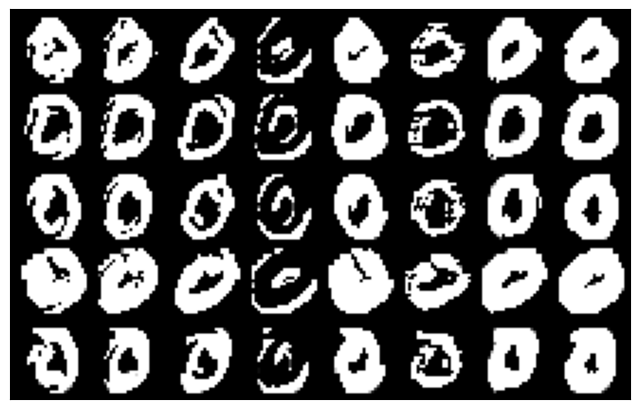

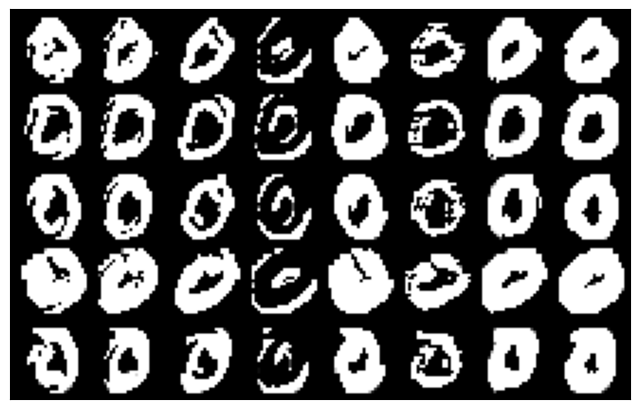

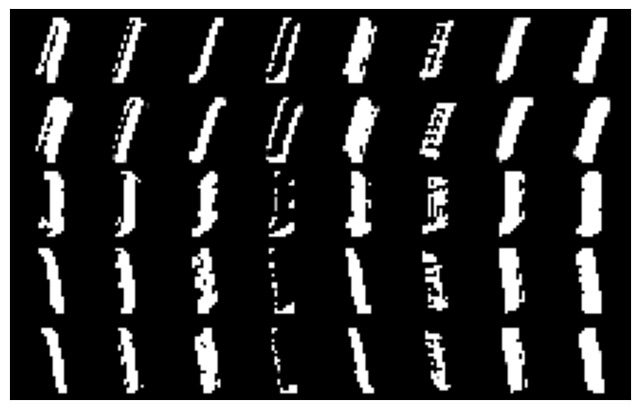

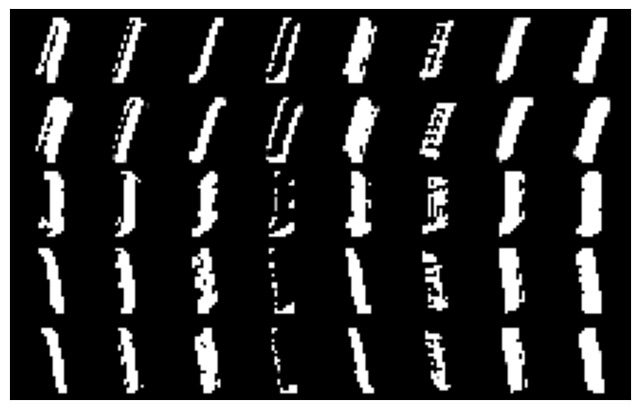

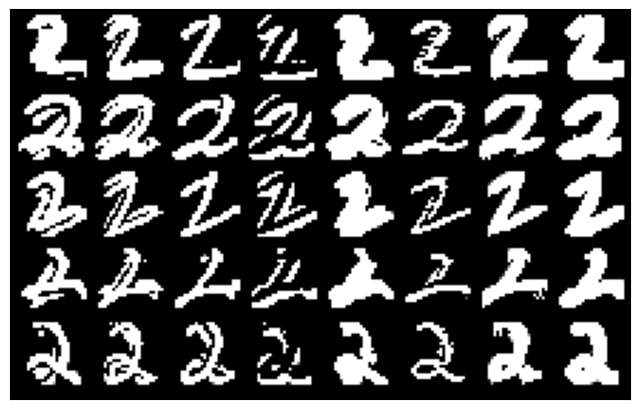

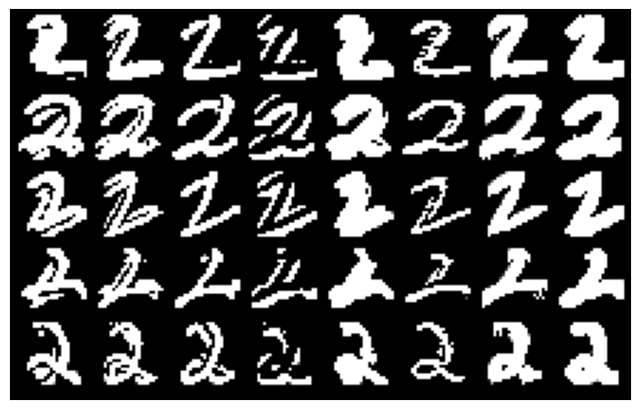

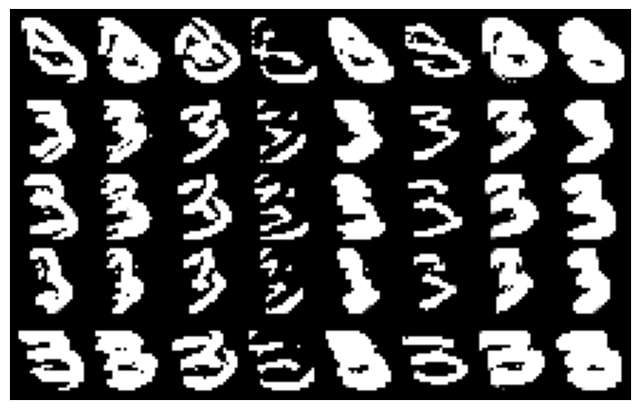

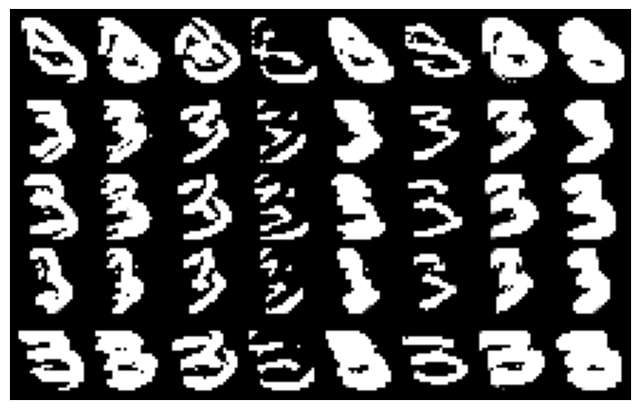

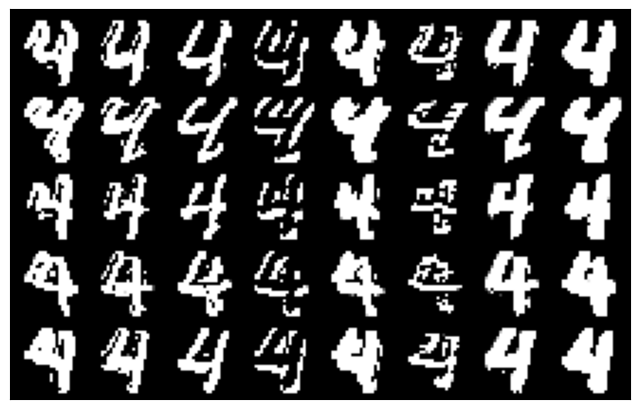

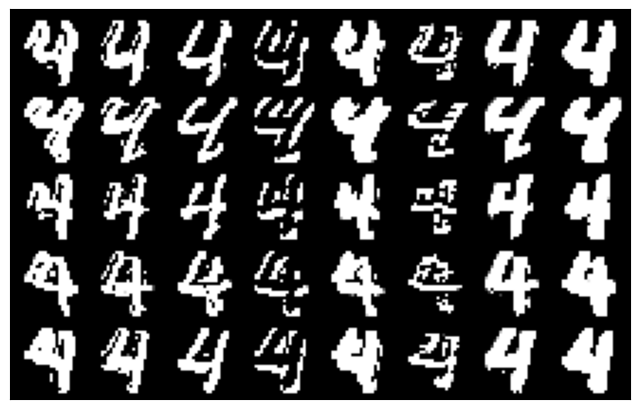

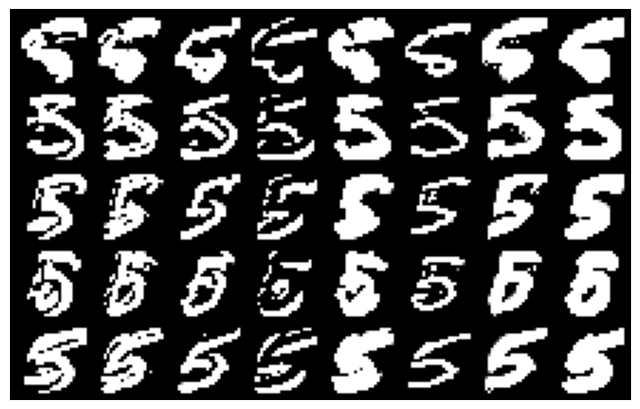

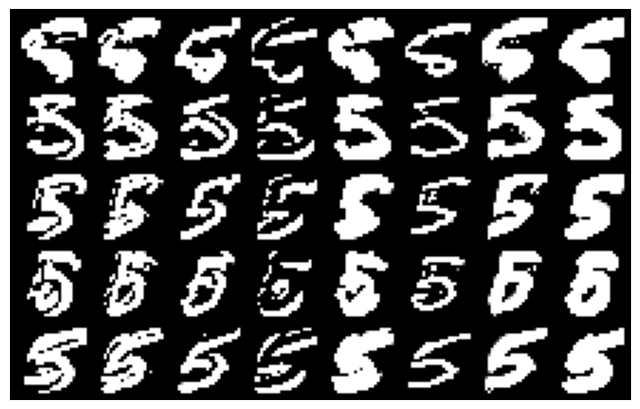

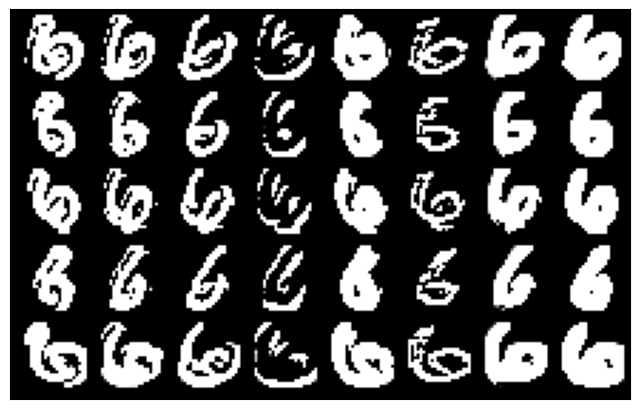

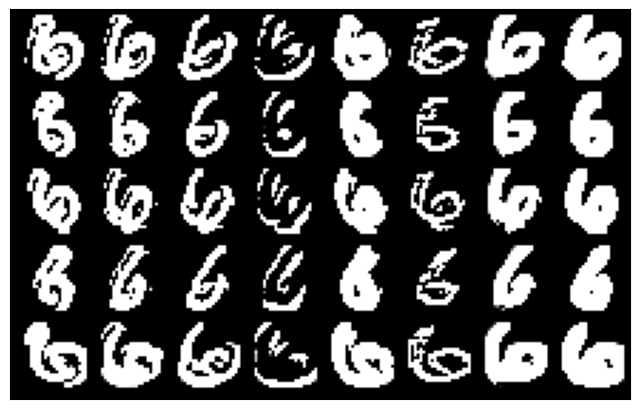

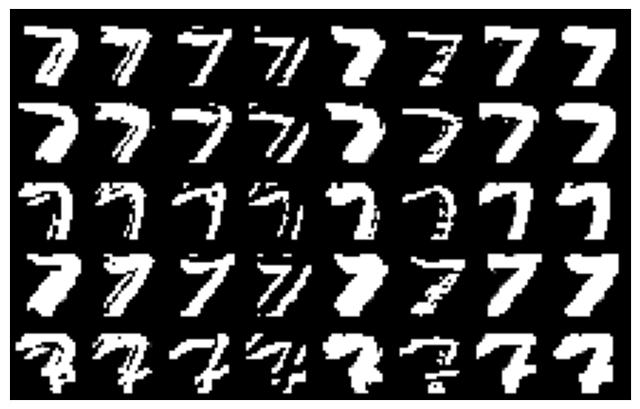

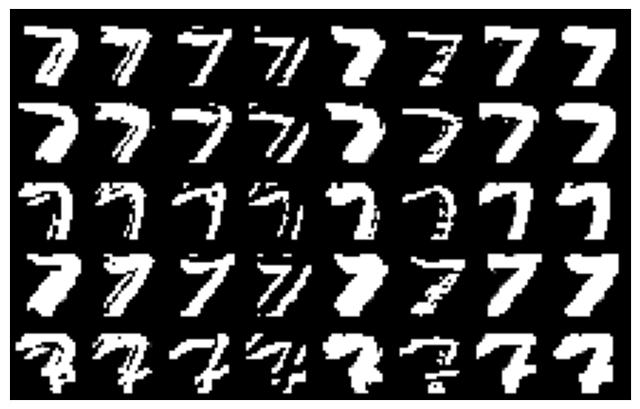

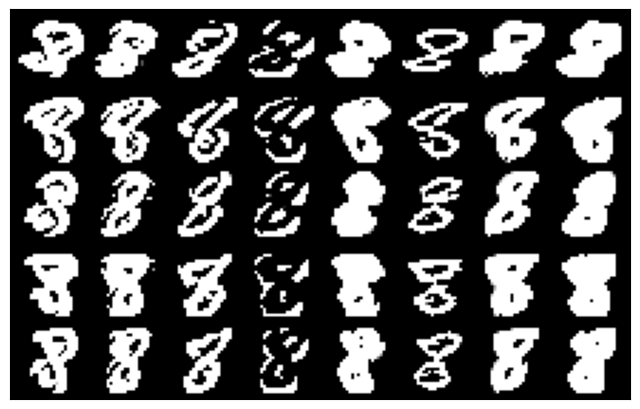

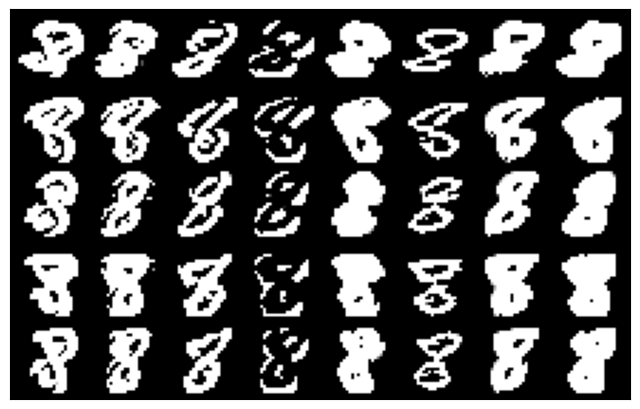

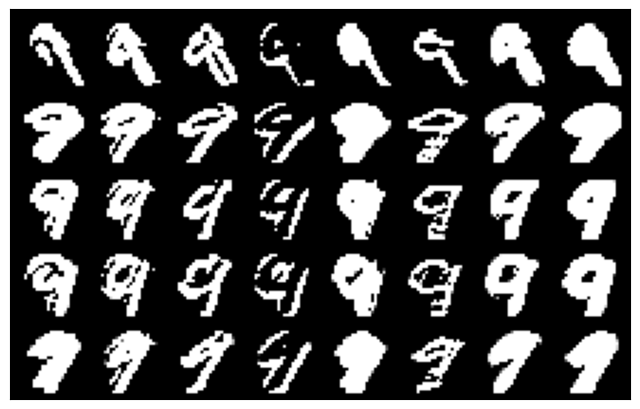

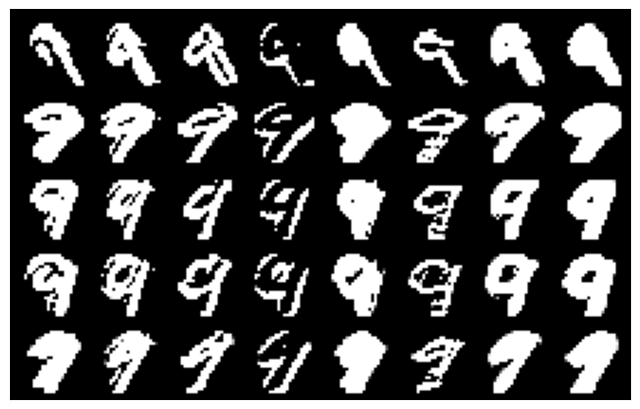

In [7]:


# implement a 2D convolutional layer using numpy
def my_conv2d(input, kernel):
    # input shape: [batch size, input_channels, input_height, input_width]
    # kernel shape: [output_channels, input_channels, filter_height, filter width]
    batch_size, input_channels, input_height, input_width = input.shape
    output_channels, input_channels, filter_height, filter_width = kernel.shape
    # output shape: [batch size, output_channels, output_height, output_width]
    output_height = input_height - filter_height + 1
    output_width = input_width - filter_width + 1
    output = np.zeros((batch_size, output_channels, output_height, output_width))
    for b in range(batch_size):
        for oc in range(output_channels):
            for ic in range(input_channels):
                for i in range(output_height):
                    for j in range(output_width):
                        output[b, oc, i, j] = np.sum(input[b, ic, i:i+filter_height, j:j+filter_width] * kernel[oc, ic])
    return output

# input shape: [batch size, input_channels, input_height, input_width]
kernel=np.load('data/kernel.npy')

for i in range(10):
    input=np.load('data/samples_{}.npy'.format(i))
    # input shape: [output_channels, input_channels, filter_height, filter width]
    out = my_conv2d(input, kernel)
    out_check = torch.conv2d(torch.tensor(input).float(), torch.tensor(kernel).float())
    np.save('outputs/out_{}.npy'.format(i), out)

    from utils import part2Plots
    part2Plots(out = out, save_dir='outputs', filename='out_{}'.format(i) )
    part2Plots(out = out_check, save_dir='outputs', filename='out_{}_check'.format(i) )

## 2.2


In [8]:
%reset -f

## Experimenting ANN Architectures

In [9]:
# Load fashion MNIST dataset
import torchvision

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform= torchvision.transforms.ToTensor(), shuffle=True)

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform= torchvision.transforms.ToTensor())


In [10]:
import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=96, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=96, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=96, shuffle=False)


### mlp_1 case
mlp_1 corresponds to FC-32, ReLU + FC10

In [19]:

from tqdm import tqdm

# example mlp classifier
class mlp_1(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(mlp_1, self).__init__()
        self.input_size = input_size
        self.FC = torch.nn.Linear(input_size, hidden_size)
        self.prediction_layer = torch.nn.Linear(hidden_size, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, self.input_size)
        hidden = self.FC(x)
        relu = self.relu(hidden)
        output = self.prediction_layer(relu)
        return output

# initialize your model
model_mlp_1 = mlp_1(784,32,10)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")
model_mlp_1.to(device)
# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()
# create optimizer
optimizer = torch.optim.Adam(model_mlp_1.parameters(), lr=0.001)
# transfer your model to train mode
model_mlp_1.train()


mlp_1_dict = {"name":"mlp_1", "loss_curve": [],  "train_acc_curve": [], "val_acc_curve": [], "test_acc": 0, 'weights': []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_mlp_1(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_mlp_1.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            mlp_1_dict['loss_curve'].append(loss_val.item())
            training_accuracy = torch.mean((torch.argmax(output, dim=1) == y).float())
            mlp_1_dict['train_acc_curve'].append(training_accuracy.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:
                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    
                    val_output = model_mlp_1(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batcuda = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            mlp_1_dict['val_acc_curve'].append(validation_accuracy_per_batch.mean().item())
            model_mlp_1.train()



# test the model
correct = 0
total = 0
for x, y in test_generator:
    x = x.to(device)
    y = y.to(device)
    
    output = model_mlp_1(x)
    _, predicted = torch.max(output, 1)
    total += y.size(0)
    correct += (predicted == y).sum().item()
print('Test Accuracy: {} %'.format(100 * correct / total))
mlp_1_dict['test_acc'] = 100 * correct / total
# save the model as a pty file
torch.save(model_mlp_1.state_dict(), 'q3_models/model_mlp_1.pty')
print("model saved as 'q3_models/model_mlp_1.pty'")
# get the parameters 784x32 layer as numpy array
weights_first_layer = model_mlp_1.FC.weight.data.cpu().numpy()
mlp_1_dict['weights'] = weights_first_layer


CUDA to be used


100%|██████████| 15/15 [06:36<00:00, 26.44s/it]

Test Accuracy: 85.55 %
model saved as 'q3_models/model_mlp_1.pty'


In [ ]:
# save mlp_1_dict as a pickle file
import pickle
with open('q3_models/mlp_1_dict.pkl', 'wb') as f:
    pickle.dump(mlp_1_dict, f)


### mlp_2 case


In [20]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor(), shuffle=True)

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=96, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=96, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=96, shuffle=False)





# example mlp classifier
class mlp_2(torch.nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        super(mlp_2, self).__init__()
        self.input_size = input_size
        self.FC1 = torch.nn.Linear(input_size, hidden_size_1)
        self.FC2 = torch.nn.Linear(hidden_size_1, hidden_size_2, bias=False)
        self.prediction_layer = torch.nn.Linear(hidden_size_2, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, self.input_size)
        hidden1 = self.FC1(x)
        relu = self.relu(hidden1)
        hidden2 = self.FC2(relu)
        output = self.prediction_layer(hidden2)
        return output

# initialize your model
model_mlp_2 = mlp_2(784 ,32 ,64 ,10)

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")
model_mlp_2.to(device)

# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()
# create optimizer
optimizer = torch.optim.Adam(model_mlp_2.parameters(), lr=0.001)
# transfer your model to train mode
model_mlp_2.train()


mlp_2_dict = {"name":"mlp_2", "loss_curve": [],  "train_acc_curve": [], "val_acc_curve": [], "test_acc": 0, 'weights': []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)

        # forward pass
        output = model_mlp_2(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_mlp_2.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            mlp_2_dict['loss_curve'].append(loss_val.item())
            training_accuracy = torch.mean((torch.argmax(output, dim=1) == y).float())
            mlp_2_dict['train_acc_curve'].append(training_accuracy.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:
                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    
                    val_output = model_mlp_2(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batch = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            mlp_2_dict['val_acc_curve'].append(validation_accuracy_per_batch.mean().item())
            model_mlp_2.train()



# test the model
correct = 0
total = 0
for x, y in test_generator:
    x = x.to(device)
    y = y.to(device)
    
    output = model_mlp_2(x)
    _, predicted = torch.max(output, 1)
    total += y.size(0)
    correct += (predicted == y).sum().item()
print('Test Accuracy: {} %'.format(100 * correct / total))
mlp_2_dict['test_acc'] = 100 * correct / total
# save the model as a pty file
torch.save(model_mlp_2.state_dict(), 'q3_models/model_mlp_2.pty')
print("model saved as 'q3_models/model_mlp_2.pty'")
# get the parameters 784x32 layer as numpy array
weights_first_layer = model_mlp_2.FC1.weight.data.cpu().numpy()
mlp_2_dict['weights'] = weights_first_layer


# save mlp_2_dict as a pickle file
import pickle
with open('q3_models/mlp_2_dict.pkl', 'wb') as f:
    pickle.dump(mlp_2_dict, f)

CUDA to be used


100%|██████████| 15/15 [06:38<00:00, 26.59s/it]

Test Accuracy: 86.75 %
model saved as 'q3_models/model_mlp_2.pty'


### CNN3
Where Conv - 3x3x16 Relu
Conv - 5x5x8 Relı, MaxPool 2x2
Conv - 7x7x16 MaxPool 2x2
Fully connected layer of 10.

In [23]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor(), shuffle=True)

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=96, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=96, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=96, shuffle=False)





# example cnn_3 classifier
class cnn_3(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_3, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,16 ,3, stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv2 = torch.nn.Conv2d(16, 8, 5,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(8, 16, 7, stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(1296, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.Conv2(relu1)
        relu2 = self.relu(hidden2)
        pool = self.MaxPool(relu2)
        hidden3 = self.Conv3(pool)
        flattened = hidden3.view(96, -1)
        output = self.prediction_layer(flattened)
        return output

# initialize your model
model_cnn_3 = cnn_3(784 ,10)
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")
model_cnn_3.to(device)

# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()
# create optimizer
optimizer = torch.optim.Adam(model_cnn_3.parameters(), lr=0.001)
# transfer your model to train mode
model_cnn_3.train()


cnn_3_dict = {"name":"cnn_3", "loss_curve": [],  "train_acc_curve": [], "val_acc_curve": [], "test_acc": 0, 'weights': []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):

        x = x.to(device)
        y = y.to(device)

        # forward pass
        output = model_cnn_3(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_3.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_3_dict['loss_curve'].append(loss_val.item())
            training_accuracy = torch.mean((torch.argmax(output, dim=1) == y).float())
            cnn_3_dict['train_acc_curve'].append(training_accuracy.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:

                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    
                    val_output = model_cnn_3(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batch = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            cnn_3_dict['val_acc_curve'].append(validation_accuracy_per_batch.mean().item())
            model_cnn_3.train()



CUDA to be used


100%|██████████| 15/15 [06:41<00:00, 26.79s/it]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x216 and 1296x10)

In [28]:


# test the model
correct = 0
total = 0
for x, y in test_generator:
    if y.size(dim = 0) < 96:
        break
    x = x.to(device)
    y = y.to(device)
    
    output = model_cnn_3(x)
    _, predicted = torch.max(output, 1)
    total += y.size(0)
    correct += (predicted == y).sum().item()
print('Test Accuracy: {} %'.format(100 * correct / total))
cnn_3_dict['test_acc'] = 100 * correct / total
# save the model as a pty file
torch.save(model_cnn_3.state_dict(), 'q3_models/model_cnn_3.pty')
print("model saved as 'q3_models/model_cnn_3.pty'")
# get the parameters 784x32 layer as numpy array
weights_first_layer = model_cnn_3.Conv1.weight.data.cpu().numpy()
cnn_3_dict['weights'] = weights_first_layer

# save cnn_3 as a pickle file
import pickle
with open('q3_models/cnn_3_dict.pkl', 'wb') as f:
    pickle.dump(cnn_3_dict, f)

Test Accuracy: 90.5048076923077 %
model saved as 'q3_models/model_cnn_3.pty'


### CNN 4


In [29]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor(), shuffle=True)

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=96, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=96, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=96, shuffle=False)





# example cnn_4 classifier
class cnn_4(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_4, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,16 ,3, stride=1, padding=1)
        self.Conv2 = torch.nn.Conv2d(16, 8, 3,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(8, 16, 5, stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv4 = torch.nn.Conv2d(16, 16, 5,  stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(400, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.Conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.Conv3(relu2)
        relu3 = self.relu(hidden3)
        pool1 = self.MaxPool(relu3)
        hidden4 = self.Conv4(pool1)
        pool2 = self.MaxPool(hidden4)
        flattened = pool2.view(96, -1)
        output = self.prediction_layer(flattened)
        return output

# initialize your model
model_cnn_4 = cnn_4(784 ,10)

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")
model_cnn_4.to(device)


# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()
# create optimizer
optimizer = torch.optim.Adam(model_cnn_4.parameters(), lr=0.001)
# transfer your model to train mode
model_cnn_4.train()


cnn_4_dict = {"name":"cnn_4", "loss_curve": [],  "train_acc_curve": [], "val_acc_curve": [], "test_acc": 0, 'weights': []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):

        x = x.to(device)
        y = y.to(device)
        
        # forward pass
        output = model_cnn_4(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_4.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_4_dict['loss_curve'].append(loss_val.item())
            training_accuracy = torch.mean((torch.argmax(output, dim=1) == y).float())
            cnn_4_dict['train_acc_curve'].append(training_accuracy.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:

                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    
                    val_output = model_cnn_4(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batch = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            cnn_4_dict['val_acc_curve'].append(validation_accuracy_per_batch.mean().item())
            model_cnn_4.train()



# test the model
correct = 0
total = 0
for x, y in test_generator:
    if y.size(dim = 0) < 96:
        break
    x = x.to(device)
    y = y.to(device)
    
    output = model_cnn_4(x)
    _, predicted = torch.max(output, 1)
    total += y.size(0)
    correct += (predicted == y).sum().item()
print('Test Accuracy: {} %'.format(100 * correct / total))
cnn_4_dict['test_acc'] = 100 * correct / total
# save the model as a pty file
torch.save(model_cnn_4.state_dict(), 'q3_models/model_cnn_4.pty')
print("model saved as 'q3_models/model_cnn_4.pty'")
# get the parameters 784x32 layer as numpy array
weights_first_layer = model_cnn_4.Conv1.weight.data.cpu().numpy()
cnn_4_dict['weights'] = weights_first_layer

# save cnn_4 as a pickle file
import pickle
with open('q3_models/cnn_4_dict.pkl', 'wb') as f:
    pickle.dump(cnn_4_dict, f)

CUDA to be used


100%|██████████| 15/15 [06:49<00:00, 27.28s/it]

Test Accuracy: 91.04567307692308 %
model saved as 'q3_models/model_cnn_4.pty'


### CNN 5


In [30]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor(), shuffle=True)

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=96, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=96, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=96, shuffle=False)





# example cnn_5 classifier
class cnn_5(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_5, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,8 ,3, stride=1, padding=1)
        self.Conv2 = torch.nn.Conv2d(8, 16, 3,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(16, 8, 3, stride=1, padding=1)
        self.Conv4 = torch.nn.Conv2d(8, 16, 3,  stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv5 = torch.nn.Conv2d(16, 16, 3,  stride=1, padding=1)
        self.Conv6 = torch.nn.Conv2d(16, 8, 3,  stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(392, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.Conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.Conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.Conv4(relu3)
        relu4 = self.relu(hidden4)
        pool1 = self.MaxPool(relu4)
        hidden5 = self.Conv5(pool1)
        relu5 = self.relu(hidden5)
        hidden6 = self.Conv6(relu5)
        relu6 = self.relu(hidden6)
        pool2 = self.MaxPool(relu6)
        flattened = pool2.view(96, -1)
        output = self.prediction_layer(flattened)
        return output

# initialize your model
model_cnn_5 = cnn_5(784 ,10)

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")
model_cnn_5.to(device)


# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()
# create optimizer
optimizer = torch.optim.Adam(model_cnn_5.parameters(), lr=0.001)
# transfer your model to train mode
model_cnn_5.train()


cnn_5_dict = {"name":"cnn_5", "loss_curve": [],  "train_acc_curve": [], "val_acc_curve": [], "test_acc": 0, 'weights': []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):

        x = x.to(device)
        y = y.to(device)
        
        # forward pass
        output = model_cnn_5(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_5.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_5_dict['loss_curve'].append(loss_val.item())
            training_accuracy = torch.mean((torch.argmax(output, dim=1) == y).float())
            cnn_5_dict['train_acc_curve'].append(training_accuracy.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:
                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    

                    val_output = model_cnn_5(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batch = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            cnn_5_dict['val_acc_curve'].append(validation_accuracy_per_batch.mean().item())
            model_cnn_5.train()



# test the model
correct = 0
total = 0
for x, y in test_generator:
    if y.size(dim = 0) < 96:
        break
    x = x.to(device)
    y = y.to(device)
    
    output = model_cnn_5(x)
    _, predicted = torch.max(output, 1)
    total += y.size(0)
    correct += (predicted == y).sum().item()
print('Test Accuracy: {} %'.format(100 * correct / total))
cnn_5_dict['test_acc'] = 100 * correct / total
# save the model as a pty file
torch.save(model_cnn_5.state_dict(), 'q3_models/model_cnn_5.pty')
print("model saved as 'q3_models/model_cnn_5.pty'")
# get the parameters 784x32 layer as numpy array
weights_first_layer = model_cnn_5.Conv1.weight.data.cpu().numpy()
cnn_5_dict['weights'] = weights_first_layer

# save cnn_5 as a pickle file
import pickle
with open('q3_models/cnn_5_dict.pkl', 'wb') as f:
    pickle.dump(cnn_5_dict, f)

CUDA to be used


100%|██████████| 15/15 [06:50<00:00, 27.39s/it]

Test Accuracy: 90.91546474358974 %
model saved as 'q3_models/model_cnn_5.pty'


dict_keys(['name', 'loss_curve', 'train_acc_curve', 'val_acc_curve', 'test_acc', 'weights'])
dict_keys(['name', 'loss_curve', 'train_acc_curve', 'val_acc_curve', 'test_acc', 'weights'])
dict_keys(['name', 'loss_curve', 'train_acc_curve', 'val_acc_curve', 'test_acc', 'weights'])
dict_keys(['name', 'loss_curve', 'train_acc_curve', 'val_acc_curve', 'test_acc', 'weights'])
dict_keys(['name', 'loss_curve', 'train_acc_curve', 'val_acc_curve', 'test_acc', 'weights'])


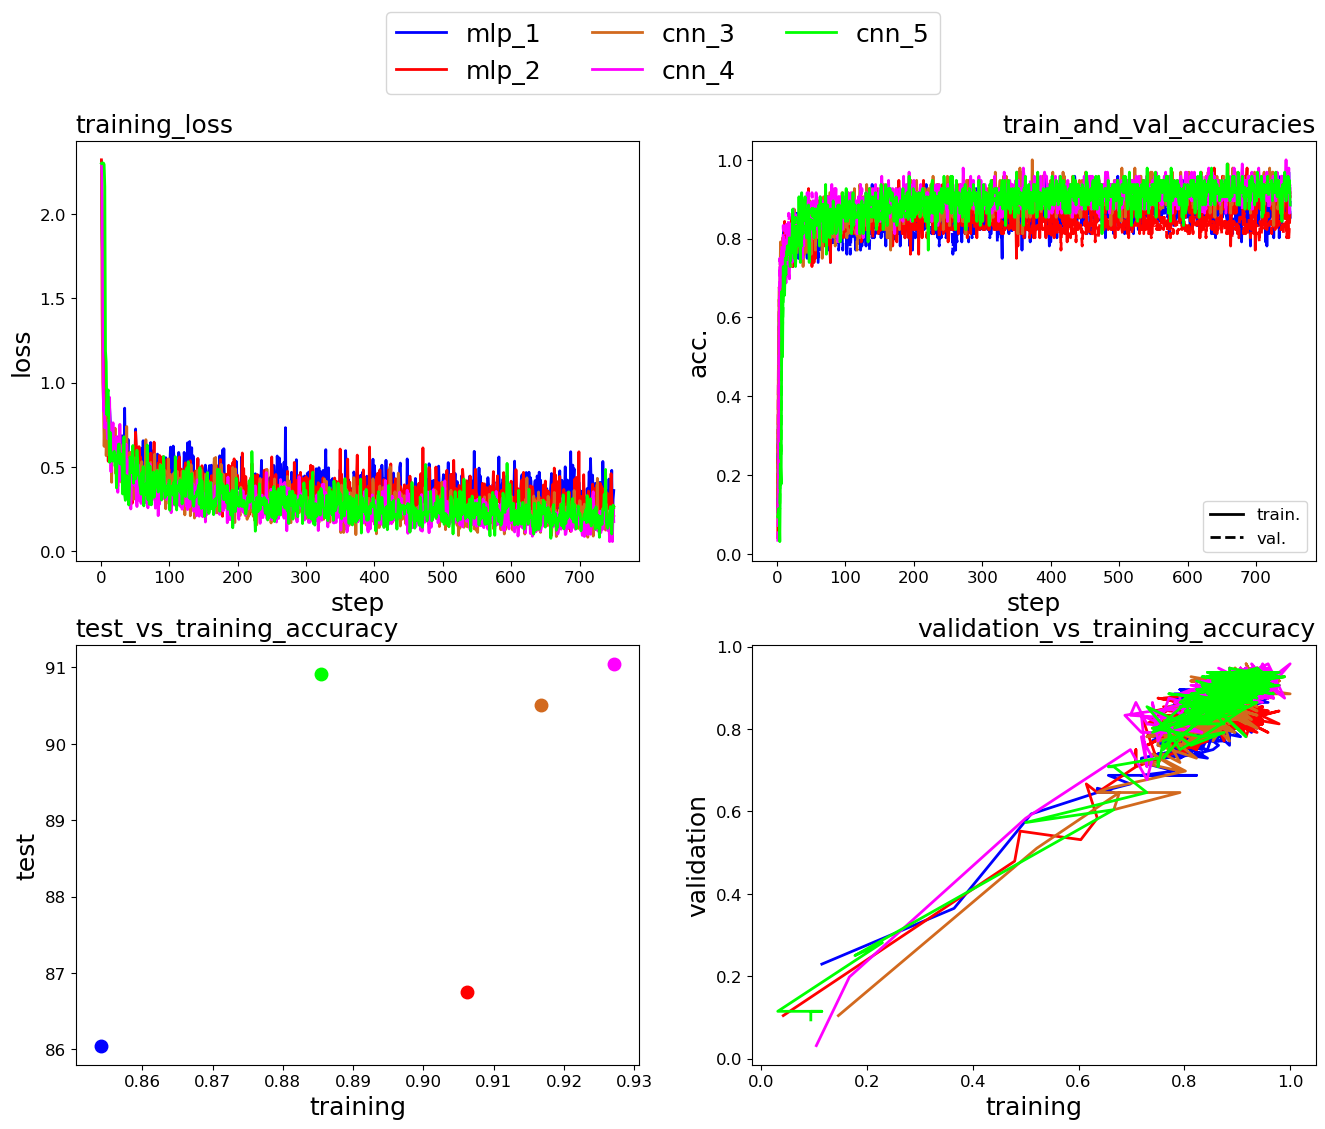

/home/ahmetakman/akman/METU EEE UNDERGRADUATE EDUCATION/8thTermSpring2024/EE449/Homeworks/hw1/utils.py:438: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


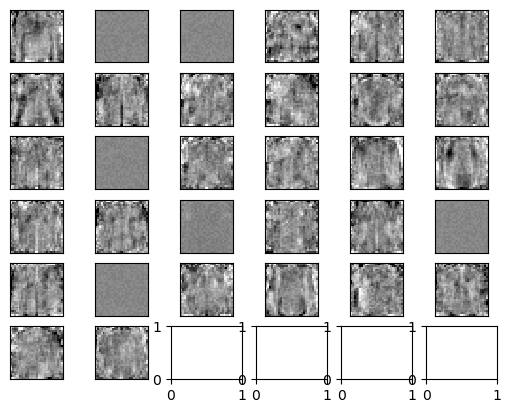

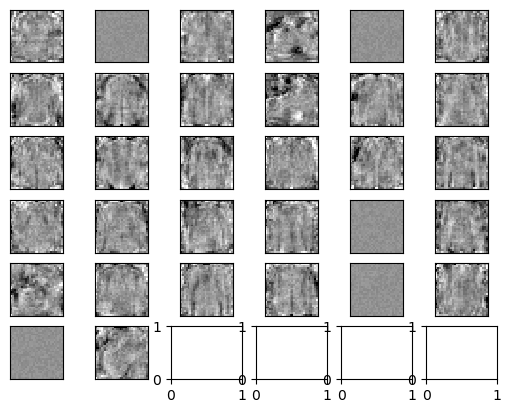

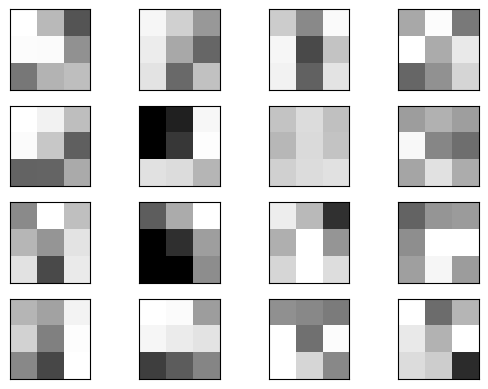

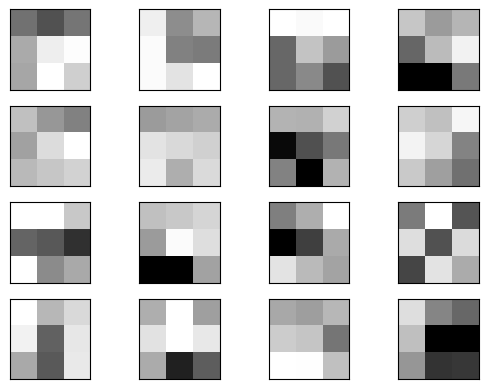

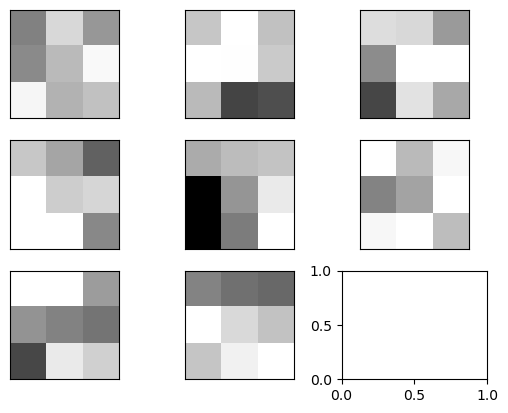

In [1]:
%reset -f

import pickle

results = []
with open('q3_models/mlp_1_dict.pkl', 'rb') as f:
    data = pickle.load(f)
    
results.append(data)
print(data.keys())

with open('q3_models/mlp_2_dict.pkl', 'rb') as f:
    data = pickle.load(f)
results.append(data)
print(data.keys())


with open('q3_models/cnn_3_dict.pkl', 'rb') as f:
    data = pickle.load(f)
results.append(data)
print(data.keys())
with open('q3_models/cnn_4_dict.pkl', 'rb') as f:
    data = pickle.load(f)
results.append(data)
print(data.keys())

with open('q3_models/cnn_5_dict.pkl', 'rb') as f:
    data = pickle.load(f)
results.append(data)
print(data.keys())



from utils import part3Plots, visualizeWeights
# To plot the curves
part3Plots(results, save_dir='q3_models', filename='q3_results')

# To plot the weights
for i in range(len(results)):
    weights = results[i]['weights']
    visualizeWeights(weights, save_dir='q3_models', filename='weights_'+results[i]['name'])

## Experimenting Activation Functions

### This part will consist of several activation function comparison trainings.
First element will be the training of mlp_1 with SGD and ReLU


In [3]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor())

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False)




# ReLU mlp classifier
class mlp_1_ReLU(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(mlp_1_ReLU, self).__init__()
        self.input_size = input_size
        self.FC = torch.nn.Linear(input_size, hidden_size)
        self.prediction_layer = torch.nn.Linear(hidden_size, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, self.input_size)
        hidden = self.FC(x)
        relu = self.relu(hidden)
        output = self.prediction_layer(relu)
        return output

# Sigmoid mlp classifier
class mlp_1_Sigmoid(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(mlp_1_Sigmoid, self).__init__()
        self.input_size = input_size
        self.FC = torch.nn.Linear(input_size, hidden_size)
        self.prediction_layer = torch.nn.Linear(hidden_size, num_classes)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = x.view(-1, self.input_size)
        hidden = self.FC(x)
        sigmoid = self.sigmoid(hidden)
        output = self.prediction_layer(sigmoid)
        return output




# initialize the relu model
model_mlp_1_relu = mlp_1_ReLU(784,32,10)
# initialize the sigmoid model
model_mlp_1_sigmoid = mlp_1_Sigmoid(784,32,10)


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")

model_mlp_1_relu.to(device)
model_mlp_1_sigmoid.to(device)

# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_mlp_1_relu.parameters(), lr=0.01)
optimizer_sigmoid = torch.optim.SGD(model_mlp_1_sigmoid.parameters(), lr=0.01)


# transfer your model to train mode
model_mlp_1_relu.train()
model_mlp_1_sigmoid.train()

mlp_1_dict = {"name":"mlp_1", "relu_loss_curve": [],  "sigmoid_loss_curve": [], "relu_grad_curve": [], "sigmoid_grad_curve": []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_mlp_1_relu(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_relu.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_relu.step()
        # print loss
        if batch % 10 == 0:
            model_mlp_1_relu.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            mlp_1_dict['relu_loss_curve'].append(loss_val.item())  
            mlp_1_dict['relu_grad_curve'].append(model_mlp_1_relu.FC.weight.grad.mean().item())

            model_mlp_1_relu.train()




# save the model as a pty file
torch.save(model_mlp_1_relu.state_dict(), 'q4_models/model_mlp_1_relu.pty')
print("model saved as 'q4_models/model_mlp_1_relu.pty'")

# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_mlp_1_sigmoid(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_sigmoid.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_sigmoid.step()
        # print loss
        if batch % 10 == 0:
            model_mlp_1_sigmoid.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            mlp_1_dict['sigmoid_loss_curve'].append(loss_val.item())  
            mlp_1_dict['sigmoid_grad_curve'].append(model_mlp_1_sigmoid.FC.weight.grad.mean().item())

            model_mlp_1_sigmoid.train()




# save the model as a pty file
torch.save(model_mlp_1_sigmoid.state_dict(), 'q4_models/model_mlp_1_sigmoid.pty')
print("model saved as 'q4_models/model_mlp_1_sigmoid.pty'")



# save mlp_1_dict as a pickle file
import pickle
with open('q4_models/part4_mlp_1_dict.pkl', 'wb') as f:
    pickle.dump(mlp_1_dict, f)

CUDA to be used


100%|██████████| 15/15 [01:36<00:00,  6.45s/it]


model saved as 'q4_models/model_mlp_1_relu.pty'


100%|██████████| 15/15 [01:34<00:00,  6.31s/it]

model saved as 'q4_models/model_mlp_1_sigmoid.pty'


### MLP2 

In [5]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor())

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False)




# ReLU mlp classifier
class mlp_2_ReLU(torch.nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        super(mlp_2_ReLU, self).__init__()
        self.input_size = input_size
        self.FC1 = torch.nn.Linear(input_size, hidden_size_1)
        self.FC2 = torch.nn.Linear(hidden_size_1, hidden_size_2, bias=False)
        self.prediction_layer = torch.nn.Linear(hidden_size_2, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, self.input_size)
        hidden1 = self.FC1(x)
        relu = self.relu(hidden1)
        hidden2 = self.FC2(relu)
        output = self.prediction_layer(hidden2)
        return output


# Sigmoid mlp classifier
class mlp_2_Sigmoid(torch.nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, num_classes):
        super(mlp_2_Sigmoid, self).__init__()
        self.input_size = input_size
        self.FC1 = torch.nn.Linear(input_size, hidden_size_1)
        self.FC2 = torch.nn.Linear(hidden_size_1, hidden_size_2, bias=False)
        self.prediction_layer = torch.nn.Linear(hidden_size_2, num_classes)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = x.view(-1, self.input_size)
        hidden1 = self.FC1(x)
        sigmoid = self.sigmoid(hidden1)
        hidden2 = self.FC2(sigmoid)
        output = self.prediction_layer(hidden2)
        return output



# initialize the relu model
model_mlp_2_relu = mlp_2_ReLU(784 ,32 ,64 ,10)
# initialize the sigmoid model
model_mlp_2_sigmoid = mlp_2_Sigmoid(784 ,32 ,64 ,10)


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")

model_mlp_2_relu.to(device)
model_mlp_2_sigmoid.to(device)

# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_mlp_2_relu.parameters(), lr=0.01)
optimizer_sigmoid = torch.optim.SGD(model_mlp_2_sigmoid.parameters(), lr=0.01)


# transfer your model to train mode
model_mlp_2_relu.train()
model_mlp_2_sigmoid.train()

mlp_2_dict = {"name":"mlp_2", "relu_loss_curve": [],  "sigmoid_loss_curve": [], "relu_grad_curve": [], "sigmoid_grad_curve": []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_mlp_2_relu(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_relu.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_relu.step()
        # print loss
        if batch % 10 == 0:
            model_mlp_2_relu.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            mlp_2_dict['relu_loss_curve'].append(loss_val.item())  
            mlp_2_dict['relu_grad_curve'].append(model_mlp_2_relu.FC1.weight.grad.mean().item())

            model_mlp_2_relu.train()




# save the model as a pty file
torch.save(model_mlp_2_relu.state_dict(), 'q4_models/model_mlp_2_relu.pty')
print("model saved as 'q4_models/model_mlp_2_relu.pty'")

# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_mlp_2_sigmoid(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_sigmoid.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_sigmoid.step()
        # print loss
        if batch % 10 == 0:
            model_mlp_2_sigmoid.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            mlp_2_dict['sigmoid_loss_curve'].append(loss_val.item())  
            mlp_2_dict['sigmoid_grad_curve'].append(model_mlp_2_sigmoid.FC1.weight.grad.mean().item())

            model_mlp_2_sigmoid.train()




# save the model as a pty file
torch.save(model_mlp_2_sigmoid.state_dict(), 'q4_models/model_mlp_2_sigmoid.pty')
print("model saved as 'q4_models/model_mlp_2_sigmoid.pty'")



# save mlp_2_dict as a pickle file
import pickle
with open('q4_models/part4_mlp_2_dict.pkl', 'wb') as f:
    pickle.dump(mlp_2_dict, f)

CUDA to be used


100%|██████████| 15/15 [01:36<00:00,  6.42s/it]


model saved as 'q4_models/model_mlp_2_relu.pty'


100%|██████████| 15/15 [01:34<00:00,  6.33s/it]

model saved as 'q4_models/model_mlp_2_sigmoid.pty'


### CNN3 Activation Function Experiment

In [7]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor())

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False)




# cnn_3 classifier
class cnn_3_relu(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_3_relu, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,16 ,3, stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv2 = torch.nn.Conv2d(16, 8, 5,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(8, 16, 7, stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(1296, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.Conv2(relu1)
        relu2 = self.relu(hidden2)
        pool = self.MaxPool(relu2)
        hidden3 = self.Conv3(pool)
        flattened = hidden3.view(96, -1)
        output = self.prediction_layer(flattened)
        return output

# sigmoid cnn_3 classifier
class cnn_3_sigmoid(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_3_sigmoid, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,16 ,3, stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv2 = torch.nn.Conv2d(16, 8, 5,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(8, 16, 7, stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(1296, num_classes)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        sigmoid1 = self.sigmoid(hidden1)
        hidden2 = self.Conv2(sigmoid1)
        sigmoid2 = self.sigmoid(hidden2)
        pool = self.MaxPool(sigmoid2)
        hidden3 = self.Conv3(pool)
        flattened = hidden3.view(96, -1)
        output = self.prediction_layer(flattened)
        return output


# initialize cnn_3 relu model
model_cnn_3_relu = cnn_3_relu(784 ,10)
# initialize cnn_3 sigmoid model
model_cnn_3_sigmoid = cnn_3_sigmoid(784 ,10)


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")

model_cnn_3_relu.to(device)
model_cnn_3_sigmoid.to(device)

# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_cnn_3_relu.parameters(), lr=0.01)
optimizer_sigmoid = torch.optim.SGD(model_cnn_3_sigmoid.parameters(), lr=0.01)


# transfer your model to train mode
model_cnn_3_relu.train()
model_cnn_3_sigmoid.train()

cnn_3_dict = {"name":"cnn_3", "relu_loss_curve": [],  "sigmoid_loss_curve": [], "relu_grad_curve": [], "sigmoid_grad_curve": []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_cnn_3_relu(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_relu.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_relu.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_3_relu.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_3_dict['relu_loss_curve'].append(loss_val.item())  
            cnn_3_dict['relu_grad_curve'].append(model_cnn_3_relu.Conv1.weight.grad.mean().item())

            model_cnn_3_relu.train()




# save the model as a pty file
torch.save(model_cnn_3_relu.state_dict(), 'q4_models/model_cnn_3_relu.pty')
print("model saved as 'q4_models/model_cnn_3_relu.pty'")

# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_cnn_3_sigmoid(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_sigmoid.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_sigmoid.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_3_sigmoid.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_3_dict['sigmoid_loss_curve'].append(loss_val.item())  
            cnn_3_dict['sigmoid_grad_curve'].append(model_cnn_3_sigmoid.Conv1.weight.grad.mean().item())

            model_cnn_3_sigmoid.train()




# save the model as a pty file
torch.save(model_cnn_3_sigmoid.state_dict(), 'q4_models/model_cnn_3_sigmoid.pty')
print("model saved as 'q4_models/model_cnn_3_sigmoid.pty'")



# save cnn_3_dict as a pickle file
import pickle
with open('q4_models/part4_cnn_3_dict.pkl', 'wb') as f:
    pickle.dump(cnn_3_dict, f)

CUDA to be used


100%|██████████| 15/15 [01:48<00:00,  7.23s/it]


model saved as 'q4_models/model_cnn_3_relu.pty'


100%|██████████| 15/15 [01:47<00:00,  7.14s/it]

model saved as 'q4_models/model_cnn_3_sigmoid.pty'


### CNN4 Activation function experiment

In [8]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor())

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False)

# relu cnn_4 classifier
class cnn_4_relu(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_4_relu, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,16 ,3, stride=1, padding=1)
        self.Conv2 = torch.nn.Conv2d(16, 8, 3,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(8, 16, 5, stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv4 = torch.nn.Conv2d(16, 16, 5,  stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(400, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.Conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.Conv3(relu2)
        relu3 = self.relu(hidden3)
        pool1 = self.MaxPool(relu3)
        hidden4 = self.Conv4(pool1)
        pool2 = self.MaxPool(hidden4)
        flattened = pool2.view(96, -1)
        output = self.prediction_layer(flattened)
        return output


# sigmoid cnn_4 classifier
class cnn_4_sigmoid(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_4_sigmoid, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,16 ,3, stride=1, padding=1)
        self.Conv2 = torch.nn.Conv2d(16, 8, 3,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(8, 16, 5, stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv4 = torch.nn.Conv2d(16, 16, 5,  stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(400, num_classes)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        sigmoid1 = self.sigmoid(hidden1)
        hidden2 = self.Conv2(sigmoid1)
        sigmoid2 = self.sigmoid(hidden2)
        hidden3 = self.Conv3(sigmoid2)
        sigmoid3 = self.sigmoid(hidden3)
        pool1 = self.MaxPool(sigmoid3)
        hidden4 = self.Conv4(pool1)
        pool2 = self.MaxPool(hidden4)
        flattened = pool2.view(96, -1)
        output = self.prediction_layer(flattened)
        return output




# initialize cnn_4 relu model
model_cnn_4_relu = cnn_4_relu(784 ,10)
# initialize cnn_4 sigmoid model
model_cnn_4_sigmoid = cnn_4_sigmoid(784 ,10)


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")

model_cnn_4_relu.to(device)
model_cnn_4_sigmoid.to(device)

# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_cnn_4_relu.parameters(), lr=0.01)
optimizer_sigmoid = torch.optim.SGD(model_cnn_4_sigmoid.parameters(), lr=0.01)


# transfer your model to train mode
model_cnn_4_relu.train()
model_cnn_4_sigmoid.train()

cnn_4_dict = {"name":"cnn_4", "relu_loss_curve": [],  "sigmoid_loss_curve": [], "relu_grad_curve": [], "sigmoid_grad_curve": []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_cnn_4_relu(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_relu.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_relu.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_4_relu.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_4_dict['relu_loss_curve'].append(loss_val.item())  
            cnn_4_dict['relu_grad_curve'].append(model_cnn_4_relu.Conv1.weight.grad.mean().item())

            model_cnn_4_relu.train()




# save the model as a pty file
torch.save(model_cnn_4_relu.state_dict(), 'q4_models/model_cnn_4_relu.pty')
print("model saved as 'q4_models/model_cnn_4_relu.pty'")

# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_cnn_4_sigmoid(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_sigmoid.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_sigmoid.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_4_sigmoid.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_4_dict['sigmoid_loss_curve'].append(loss_val.item())  
            cnn_4_dict['sigmoid_grad_curve'].append(model_cnn_4_sigmoid.Conv1.weight.grad.mean().item())

            model_cnn_4_sigmoid.train()




# save the model as a pty file
torch.save(model_cnn_4_sigmoid.state_dict(), 'q4_models/model_cnn_4_sigmoid.pty')
print("model saved as 'q4_models/model_cnn_4_sigmoid.pty'")



# save cnn_4_dict as a pickle file
import pickle
with open('q4_models/part4_cnn_4_dict.pkl', 'wb') as f:
    pickle.dump(cnn_4_dict, f)

CUDA to be used


100%|██████████| 15/15 [01:53<00:00,  7.55s/it]


model saved as 'q4_models/model_cnn_4_relu.pty'


100%|██████████| 15/15 [01:54<00:00,  7.64s/it]

model saved as 'q4_models/model_cnn_4_sigmoid.pty'


### CNN5 Activation Function Experiment

In [9]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor())

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.8 and 0.2 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.8, 0.2])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False)

# relu cnn_5 classifier
class cnn_5_relu(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_5_relu, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,8 ,3, stride=1, padding=1)
        self.Conv2 = torch.nn.Conv2d(8, 16, 3,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(16, 8, 3, stride=1, padding=1)
        self.Conv4 = torch.nn.Conv2d(8, 16, 3,  stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv5 = torch.nn.Conv2d(16, 16, 3,  stride=1, padding=1)
        self.Conv6 = torch.nn.Conv2d(16, 8, 3,  stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(392, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.Conv2(relu1)
        relu2 = self.relu(hidden2)
        hidden3 = self.Conv3(relu2)
        relu3 = self.relu(hidden3)
        hidden4 = self.Conv4(relu3)
        relu4 = self.relu(hidden4)
        pool1 = self.MaxPool(relu4)
        hidden5 = self.Conv5(pool1)
        relu5 = self.relu(hidden5)
        hidden6 = self.Conv6(relu5)
        relu6 = self.relu(hidden6)
        pool2 = self.MaxPool(relu6)
        flattened = pool2.view(96, -1)
        output = self.prediction_layer(flattened)
        return output

# sigmoid cnn_5 classifier
class cnn_5_sigmoid(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_5_sigmoid, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,8 ,3, stride=1, padding=1)
        self.Conv2 = torch.nn.Conv2d(8, 16, 3,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(16, 8, 3, stride=1, padding=1)
        self.Conv4 = torch.nn.Conv2d(8, 16, 3,  stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv5 = torch.nn.Conv2d(16, 16, 3,  stride=1, padding=1)
        self.Conv6 = torch.nn.Conv2d(16, 8, 3,  stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(392, num_classes)
        self.sigmoid = torch.nn.Sigmoid()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        sigmoid1 = self.sigmoid(hidden1)
        hidden2 = self.Conv2(sigmoid1)
        sigmoid2 = self.sigmoid(hidden2)
        hidden3 = self.Conv3(sigmoid2)
        sigmoid3 = self.sigmoid(hidden3)
        hidden4 = self.Conv4(sigmoid3)
        sigmoid4 = self.sigmoid(hidden4)
        pool1 = self.MaxPool(sigmoid4)
        hidden5 = self.Conv5(pool1)
        sigmoid5 = self.sigmoid(hidden5)
        hidden6 = self.Conv6(sigmoid5)
        sigmoid6 = self.sigmoid(hidden6)
        pool2 = self.MaxPool(sigmoid6)
        flattened = pool2.view(96, -1)
        output = self.prediction_layer(flattened)
        return output



# initialize cnn_5 relu model
model_cnn_5_relu = cnn_5_relu(784 ,10)
# initialize cnn_5 sigmoid model
model_cnn_5_sigmoid = cnn_5_sigmoid(784 ,10)


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")

model_cnn_5_relu.to(device)
model_cnn_5_sigmoid.to(device)

# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_cnn_5_relu.parameters(), lr=0.01)
optimizer_sigmoid = torch.optim.SGD(model_cnn_5_sigmoid.parameters(), lr=0.01)


# transfer your model to train mode
model_cnn_5_relu.train()
model_cnn_5_sigmoid.train()

cnn_5_dict = {"name":"cnn_5", "relu_loss_curve": [],  "sigmoid_loss_curve": [], "relu_grad_curve": [], "sigmoid_grad_curve": []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_cnn_5_relu(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_relu.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_relu.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_5_relu.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_5_dict['relu_loss_curve'].append(loss_val.item())  
            cnn_5_dict['relu_grad_curve'].append(model_cnn_5_relu.Conv1.weight.grad.mean().item())

            model_cnn_5_relu.train()




# save the model as a pty file
torch.save(model_cnn_5_relu.state_dict(), 'q4_models/model_cnn_5_relu.pty')
print("model saved as 'q4_models/model_cnn_5_relu.pty'")

# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(15)):
    for batch, (x, y) in enumerate(train_generator):
        x = x.to(device)
        y = y.to(device)
        # forward pass
        output = model_cnn_5_sigmoid(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer_sigmoid.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer_sigmoid.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_5_sigmoid.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_5_dict['sigmoid_loss_curve'].append(loss_val.item())  
            cnn_5_dict['sigmoid_grad_curve'].append(model_cnn_5_sigmoid.Conv1.weight.grad.mean().item())

            model_cnn_5_sigmoid.train()




# save the model as a pty file
torch.save(model_cnn_5_sigmoid.state_dict(), 'q4_models/model_cnn_5_sigmoid.pty')
print("model saved as 'q4_models/model_cnn_5_sigmoid.pty'")



# save cnn_5_dict as a pickle file
import pickle
with open('q4_models/part4_cnn_5_dict.pkl', 'wb') as f:
    pickle.dump(cnn_5_dict, f)

CUDA to be used


100%|██████████| 15/15 [02:04<00:00,  8.27s/it]


model saved as 'q4_models/model_cnn_5_relu.pty'


100%|██████████| 15/15 [02:03<00:00,  8.24s/it]

model saved as 'q4_models/model_cnn_5_sigmoid.pty'


## Part 4 plotting part.

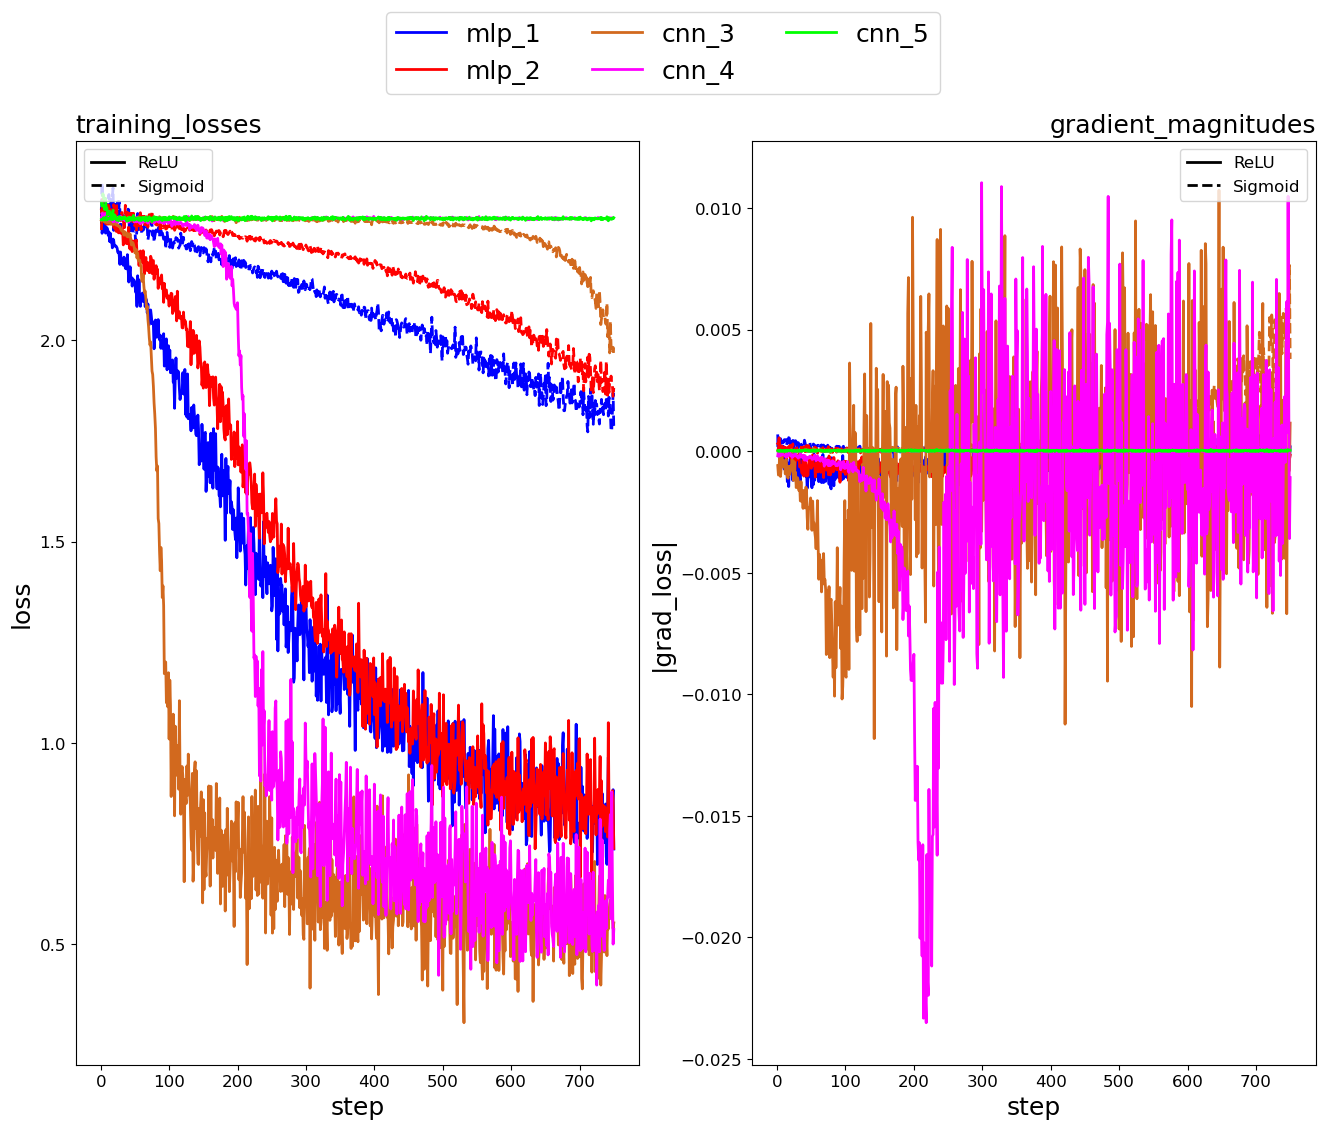

In [16]:
%reset -f
from utils import part4Plots
import pickle

# load the pickle files
with open('q4_models/part4_mlp_1_dict.pkl', 'rb') as f:
    mlp_1_dict = pickle.load(f)

with open('q4_models/part4_mlp_2_dict.pkl', 'rb') as f:
    mlp_2_dict = pickle.load(f)

with open('q4_models/part4_cnn_3_dict.pkl', 'rb') as f:
    cnn_3_dict = pickle.load(f)

with open('q4_models/part4_cnn_4_dict.pkl', 'rb') as f:
    cnn_4_dict = pickle.load(f)

with open('q4_models/part4_cnn_5_dict.pkl', 'rb') as f:
    cnn_5_dict = pickle.load(f)
results = [mlp_1_dict, mlp_2_dict, cnn_3_dict, cnn_4_dict, cnn_5_dict]

part4Plots(results, "q4_models")


## Experimenting Learning Rate

 My favorite architecture is CNN3.

 

In [ ]:
%reset -f

# Load fashion MNIST dataset
import torchvision

from tqdm import tqdm

#training set
train_data = torchvision.datasets.FashionMNIST(root='./data', train=True, download=False, transform= torchvision.transforms.ToTensor())

#test set
test_data = torchvision.datasets.FashionMNIST(root='./data', train=False, download=False, transform= torchvision.transforms.ToTensor())


import torch
# divide training data into training and validation sets of 0.9 and 0.1 respectively

train_data, val_data = torch.utils.data.random_split(train_data, [0.9, 0.1])

train_generator = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True)
val_generator = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False)
test_generator = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False)



# cnn_3 classifier
class cnn_3(torch.nn.Module):
    def __init__(self, input_size, num_classes):
        super(cnn_3, self).__init__()
        self.input_size = input_size
        self.Conv1 = torch.nn.Conv2d(1 ,16 ,3, stride=1, padding=1)
        self.MaxPool = torch.nn.MaxPool2d(2, stride=2)
        self.Conv2 = torch.nn.Conv2d(16, 8, 5,  stride=1, padding=1)
        self.Conv3 = torch.nn.Conv2d(8, 16, 7, stride=1, padding=1)
        self.prediction_layer = torch.nn.Linear(1296, num_classes)
        self.relu = torch.nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        hidden1 = self.Conv1(x)
        relu1 = self.relu(hidden1)
        hidden2 = self.Conv2(relu1)
        relu2 = self.relu(hidden2)
        pool = self.MaxPool(relu2)
        hidden3 = self.Conv3(pool)
        flattened = hidden3.view(96, -1)
        output = self.prediction_layer(flattened)
        return output


# initialize cnn_5 relu model
model_cnn_3 = cnn_3(784 ,10)


if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("CUDA to be used")
else:
    device = "cpu"
    print("CPU to be used.")

model_cnn_3.to(device)


# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_cnn_3.parameters(), lr=0.1)


# transfer your model to train mode
model_cnn_3.train()


cnn_3 = {"name":"cnn_3", "loss_curve_1": [],  "loss_curve_01": [], "loss_curve_001": [], "val_acc_curve_1": [], "val_acc_curve_01": [], "val_acc_curve_001": []}



# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(20)):
    for batch, (x, y) in enumerate(train_generator):

        x = x.to(device)
        y = y.to(device)

        # forward pass
        output = model_cnn_3(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_3.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_3_dict['loss_curve_1'].append(loss_val.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:

                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    
                    val_output = model_cnn_3(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batch = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            cnn_3_dict['val_acc_curve_1'].append(validation_accuracy_per_batch.mean().item())
            model_cnn_3.train()




# initialize cnn_5 relu model
model_cnn_3 = cnn_3(784 ,10)

model_cnn_3.to(device)


# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_cnn_3.parameters(), lr=0.01)


# transfer your model to train mode
model_cnn_3.train()

# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(20)):
    for batch, (x, y) in enumerate(train_generator):

        x = x.to(device)
        y = y.to(device)

        # forward pass
        output = model_cnn_3(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_3.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_3_dict['loss_curve_01'].append(loss_val.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:

                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    
                    val_output = model_cnn_3(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batch = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            cnn_3_dict['val_acc_curve_01'].append(validation_accuracy_per_batch.mean().item())
            model_cnn_3.train()




# initialize cnn_5 relu model
model_cnn_3 = cnn_3(784 ,10)

model_cnn_3.to(device)


# create loss: use cross entropy loss
loss = torch.nn.CrossEntropyLoss()

# create optimizer
optimizer_relu = torch.optim.SGD(model_cnn_3.parameters(), lr=0.001)


# transfer your model to train mode
model_cnn_3.train()

# train the model and save the training loss and validation loss for every 10 batches using model eval mode.s
for epoch in tqdm(range(20)):
    for batch, (x, y) in enumerate(train_generator):

        x = x.to(device)
        y = y.to(device)

        # forward pass
        output = model_cnn_3(x)
        # compute loss
        loss_val = loss(output, y)
        # zero gradients
        optimizer.zero_grad()
        # backward pass
        loss_val.backward()
        # optimize
        optimizer.step()
        # print loss
        if batch % 10 == 0:
            model_cnn_3.eval()
            #print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch, batch, loss_val.item()))
            cnn_3_dict['loss_curve_001'].append(loss_val.item())

            # validation loss   
            validation_accuracy_per_batch = torch.tensor([])
            with torch.no_grad():
                for val_x, val_y in val_generator:

                    val_x = val_x.to(device)
                    val_y = val_y.to(device)
                    
                    val_output = model_cnn_3(val_x)
                    #val_loss = loss(val_output, val_y)
                    val_accuracy = torch.mean((torch.argmax(val_output, dim=1) == val_y).float())
                    try:
                        validation_accuracy_per_batch = torch.cat((validation_accuracy_per_batch ,val_accuracy))
                    except:
                        validation_accuracy_per_batch = val_accuracy
            #print('Validation Accuracy: {}'.format(validation_accuracy_per_batch.mean()))
            cnn_3_dict['val_acc_curve_001'].append(validation_accuracy_per_batch.mean().item())
            model_cnn_3.train()



# save cnn_3_dict as a pickle file
import pickle
with open('q5_models/part5_cnn_3_dict.pkl', 'wb') as f:
    pickle.dump(cnn_3_dict, f)